# Analysis of Reddit Data from Ethereum, Bitcoin, and Ethereum Classic Subreddits

#### The below analysis was in examination of the public-facing information contained in the Ethereum, Bitcoin, and Ethereum Classic subreddits. However, the code can be manipulated to analyze information in any subreddit.
#### It does need a lot of cleaning up which I will do once I've drafted my results and analysis, so stay tuned for changes and any suggestions are greatly appreciated. I will eventually turn this into an analysis library for the LIbreQDA Project. :)

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from collections import Counter
from string import punctuation
import re
import os

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

## Load the CSV file output from Scrapy into DataFrames

In [3]:
# Open CSV files from Scrapy output
# your schema from the Scrapy output should be: author; tagline; time_rel; comments; title; time_all(this is where dow, mon, day, time, year, tz, and dtg come from)
# your final schema should be: author; tagline; time_rel(relative time of post from date of viewing); comments(' comments' removed); title; dow(day of the week 3-letter); mon(month 3-letter); day(1-31); time(24 hour clock); year; tz(timezone); dtg(date/time group).

# load Ethereum subreddit CSV into new DataFrame
threads_eth = pd.read_csv('redditData/threads_eth.csv')
threads_btc = pd.read_csv('redditData/threads_btc.csv')
threads_etc = pd.read_csv('redditData/threads_etc.csv')

# Parser function for comments and date/time information
# Argument is the name of dataframe object from imported CSV

def dtg_comment_parser(threads_df):
    # To parse 'comments' to new schema
    threads_df['comments'] = threads_df['comments'].map(lambda x: x.rstrip(' comments'))
    threads_df.comments = threads_df.comments.convert_objects(convert_numeric = True)
    # parser for the 'time_all' into new schema
    threads_df['dow'] = threads_df.time_all.map(lambda x: (str(x).split(' ')[1]).lstrip('title="'))
    threads_df['mon'] = threads_df.time_all.map(lambda x: (str(x).split(' ')[2]))
    threads_df['day'] = threads_df.time_all.map(lambda x: (str(x).split(' ')[3]))
    threads_df.day = threads_df.day.convert_objects(convert_numeric = True)
    threads_df['time'] = threads_df.time_all.map(lambda x: (str(x).split(' ')[4]))
    threads_df['year'] = threads_df.time_all.map(lambda x: (str(x).split(' ')[5]))
    threads_df.year = threads_df.year.convert_objects(convert_numeric = True)
    threads_df['tz'] = threads_df.time_all.map(lambda x: (str(x).split(' ')[6]).rstrip('"'))
    threads_df['dtg'] = threads_df.time_all.map(lambda x: (str(x).split('"')[3]))

dtg_comment_parser(threads_eth)
dtg_comment_parser(threads_btc)
dtg_comment_parser(threads_etc)

# drop the 'time_all' column
threads_eth = threads_eth.drop('time_all', 1)
threads_btc = threads_btc.drop('time_all', 1)
threads_etc = threads_etc.drop('time_all', 1)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:24: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [ ]:
# import CSV with final schema into DataFrames (if external parse)

# threads_eth = pd.read_csv('redditData/threads_eth_ext.csv')
# threads_btc = pd.read_csv('redditData/threads_btc_ext.csv')
# threads_etc = pd.read_csv('redditData/threads_etc_ext.csv')


## Analysis of Reddit Authors

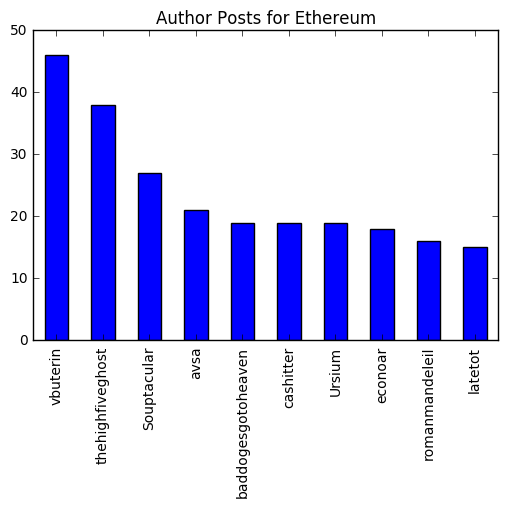

In [4]:
# Graph of author posts for Ethereum

eth_author = threads_eth.author
eth_author_bar = eth_author.value_counts().head(10).plot(kind='bar')
eth_author_bar.set_title('Author Posts for Ethereum')


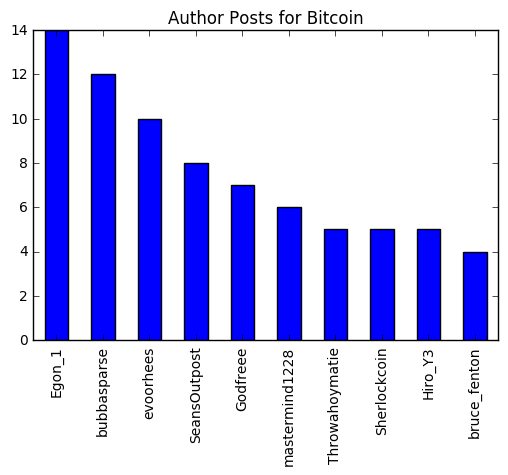

In [5]:
# Graph of author posts for Bitcoin

btc_author = threads_btc.author
btc_author_bar = btc_author.value_counts().head(10).plot(kind='bar')
btc_author_bar.set_title('Author Posts for Bitcoin')


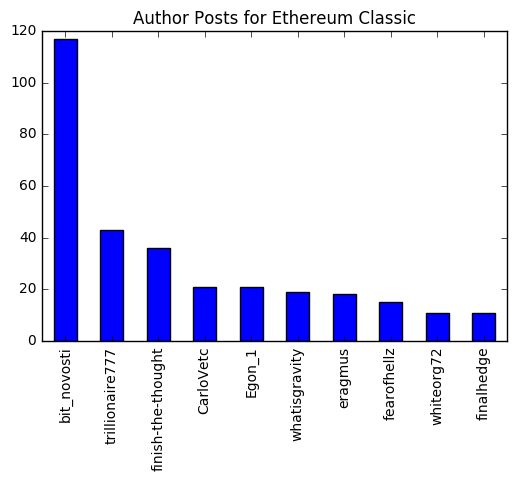

In [6]:
# Graph of author posts for Ethereum Classic

etc_author = threads_etc.author
etc_author_bar = etc_author.value_counts().head(10).plot(kind='bar')
etc_author_bar.set_title('Author Posts for Ethereum Classic')


### Comments and titles per author in ETH, BTC, or ETC

In [7]:
# Comments from Ethereum with authors
eth_comments = threads_eth[['author', 'comments', 'title']].copy()

# Highest number of comments on unique post by author
eth_comments.sort_values(by='comments', ascending=False).head(10)


,author,comments,title
36,thehighfiveghost,1006.0,Critical update RE: DAO Vulnerability
0,vbuterin,843.0,Personal statement regarding the fork
74,latetot,558.0,The ability to reverse exploits that violate t...
17,vbuterin,509.0,The Current HF Status
53,AttaAtta,494.0,An Ethereum hard fork is not a bailout; it’s f...
25,Rune4444,482.0,"A ""too big to fail"" political hard fork is ver..."
168,VoiceOfTheEvolution,392.0,Devil's Advocate: What incentive is there for ...
10,ledgerwatch,390.0,I think TheDAO is getting drained right now
42,GloomyOak,374.0,It seems attacker just targeted the WhiteHatDAOs
148,ProHashing,369.0,Why Ethereum should fork


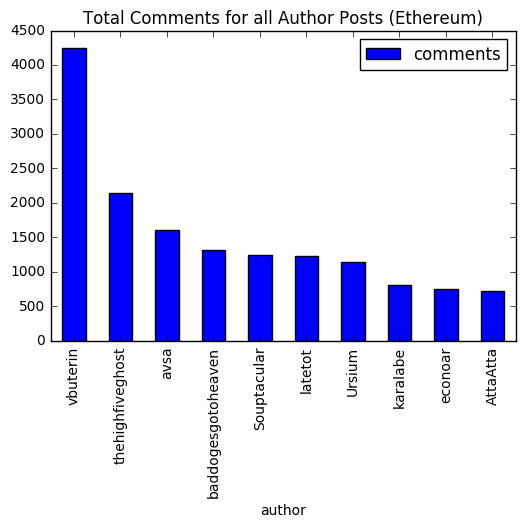

In [8]:
# Total number of comments received by author for all author's posts

eth_comment_tot = eth_comments.groupby('author').sum()
eth_comment_tot_sort = eth_comment_tot.sort_values(by='comments', ascending=False).head(10).plot(kind='bar')
eth_comment_tot_sort.set_title('Total Comments for all Author Posts (Ethereum)')


In [9]:
# Comments from Bitcoin with authors
btc_comments = threads_btc[['author', 'comments', 'title']].copy()

# Highest number of comments on unique post by author
btc_comments.sort_values(by='comments', ascending=False).head(10)


,author,comments,title
794,zanetackett,2713,Bitfinex security breach: Trading will be halt...
76,evoorhees,2137,Some words for my friends
410,BenLawsky,2129,"Hi, this is Ben Lawsky at NYDFS. Here are the ..."
13,hexdump,2100,Silk Road operator Ross Ulbricht to sentenced ...
89,Zomdifros,1843,The Face Behind Bitcoin: Satoshi Nakamoto is.....
366,josiah__Coinsetter,1658,"IRS declares Bitcoin as property, not currency"
103,SecretCheese,1567,Silk Road website founder Ross Ulbricht found ...
36,l0gz,1511,REAL Satoshi Nakamoto denies being Dorian Naka...
15,evoorhees,1455,Open Letter to Michael Casey - WSJ reporter wh...
238,WeAreMtGox,1400,We are Mt. Gox: AMA


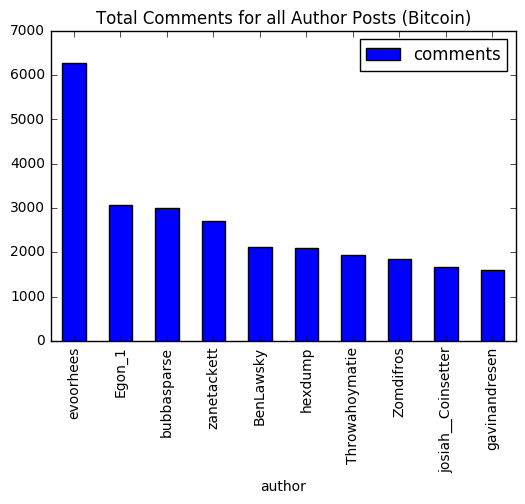

In [10]:
# Total number of comments received by author for all author's posts

btc_comment_tot = btc_comments.groupby('author').sum()
btc_comment_tot_sort = btc_comment_tot.sort_values(by='comments', ascending=False).head(10).plot(kind='bar')
btc_comment_tot_sort.set_title('Total Comments for all Author Posts (Bitcoin)')


In [11]:
# Comments from Ethereum Classic with authors
etc_comments = threads_etc[['author', 'comments', 'title']].copy()

# Highest number of comments on unique post by author
etc_comments.sort_values(by='comments', ascending=False).head(10)


,author,comments,title
188,ttggtthhh,162.0,Alex van de Sande (/u/avsa) and the rest of th...
22,jbaylina,144.0,Follow Up Statement on the ETC Salvaged from a...
59,publius2050000,128.0,Declaration on the Future of Ethereum Classic
48,slacknation,121.0,white hat went rogue
9,biglambda,99.0,Vitalik Buterin says he won't support ETC even...
88,TheRandyMagnum,98.0,"Charles Hoskinson on ETC, ""Devs are coming."""
179,LGuappo,97.0,Serious question: What do you guys think the a...
99,Newbium,97.0,Barry Silbert To Buy ETC Until It Reaches ETH ...
1,bit_novosti,96.0,"Hard fork went smoothly, Ethereum Classic chai..."
0,bit_novosti,94.0,Call for action: What can I do to help Ethereu...


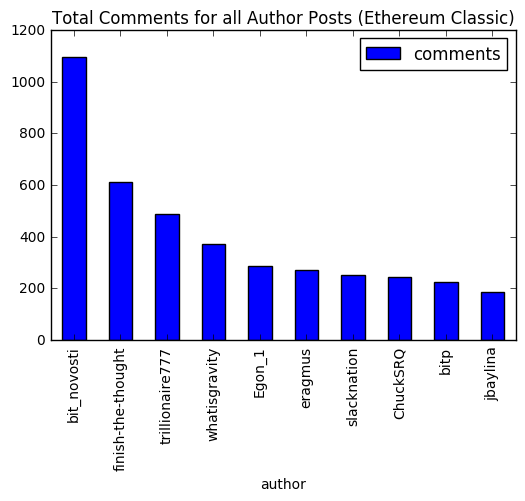

In [12]:
# Total number of comments received by author for all author's posts

etc_comment_tot = etc_comments.groupby('author').sum()
etc_comment_tot_sort = etc_comment_tot.sort_values(by='comments', ascending=False).head(10).plot(kind='bar')
etc_comment_tot_sort.set_title('Total Comments for all Author Posts (Ethereum Classic)')


### Count of authors that are found in ETH, BTC, and ETC forums

In [13]:
# Convert the above Series into DataFrames

df_eth = pd.Series.to_frame(eth_author.drop_duplicates(keep='first'))
df_btc = pd.Series.to_frame(btc_author.drop_duplicates(keep='first'))
df_etc = pd.Series.to_frame(etc_author.drop_duplicates(keep='first'))


BTC: 769 ETC: 399 ETH: 426


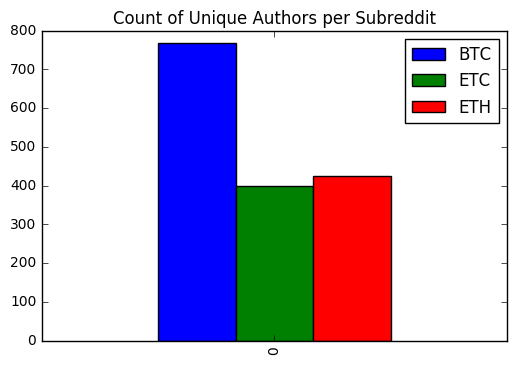

In [14]:
# Count of unique authors in forums

unique_author = pd.DataFrame({'ETH': [len(df_eth)], 'BTC': [len(df_btc)], 'ETC': [len(df_etc)]}).plot(kind='bar')
unique_author.set_title('Count of Unique Authors per Subreddit')
print('BTC:', len(df_btc), 'ETC:', len(df_etc), 'ETH:',len(df_eth))

In [15]:
# Create a dataframe with all authors

df_authors = pd.DataFrame({}, columns=('btc', 'eth', 'etc'))
df_authors.btc = df_btc.author
df_authors.eth = df_eth.author
df_authors.etc = df_etc.author
# df_authors
    

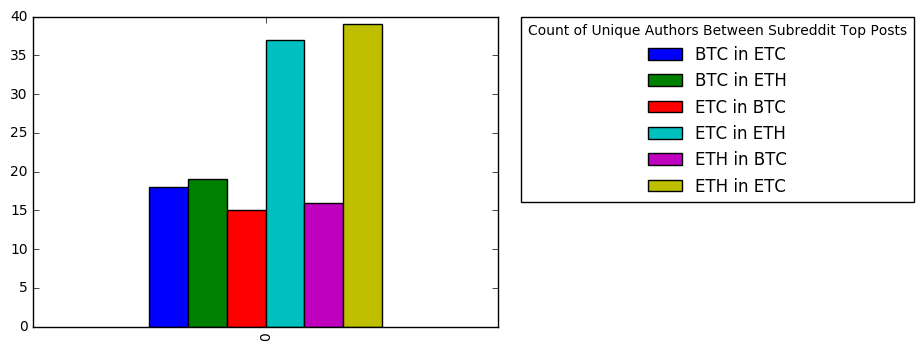

In [16]:
# Count of which posts in one forum have been created by unique authors from another forum
# Keep in mind that this is from the top 1000 posts; an author may have a top post in one but not another

btc_in_eth = Counter(df_authors.btc.dropna().isin(eth_author) == True)
btc_in_etc = Counter(df_authors.btc.dropna().isin(etc_author) == True)
eth_in_etc = Counter(df_authors.eth.dropna().isin(etc_author) == True)
eth_in_btc = Counter(df_authors.eth.dropna().isin(btc_author) == True)
etc_in_btc = Counter(df_authors.etc.dropna().isin(btc_author) == True)
etc_in_eth = Counter(df_authors.etc.dropna().isin(eth_author) == True)

multiple_author = pd.DataFrame({'BTC in ETH': [btc_in_eth[True]], 'BTC in ETC': [btc_in_etc[True]], 'ETH in BTC': [eth_in_btc[True]], 'ETH in ETC': [eth_in_etc[True]], 'ETC in BTC': [etc_in_btc[True]], 'ETC in ETH': [etc_in_eth[True]]})
ma_graph = multiple_author.plot(kind='bar')
ma_graph.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title('Count of Unique Authors Between Subreddit Top Posts')


In [17]:
# Table for above graph

multiple_author

,BTC in ETC,BTC in ETH,ETC in BTC,ETC in ETH,ETH in BTC,ETH in ETC
0,18,19,15,37,16,39


### Table of author names that are found between ETH, BTC, and ETC forums

In [18]:
# Author names from Bitcoin subreddit who posted in Ethereum subreddit

authors_btc_in_eth = df_authors[df_authors.btc.isin(df_authors.eth)]
authors_btc_in_eth = authors_btc_in_eth.btc
authors_btc_in_eth = authors_btc_in_eth.dropna()

# Author names from Ethereum subreddit who posted in Bitcoin subreddit

authors_eth_in_btc = df_authors[df_authors.eth.isin(df_authors.btc)]
authors_eth_in_btc = authors_eth_in_btc.eth
authors_eth_in_btc = authors_eth_in_btc.dropna()

# Author names from Bitcoin subreddit who posted in Ethereum Classic subreddit

authors_btc_in_etc = df_authors[df_authors.btc.isin(df_authors.etc)]
authors_btc_in_etc = authors_btc_in_etc.btc
authors_btc_in_etc = authors_btc_in_etc.dropna()

# Author names from Ethereum Classic subreddit who posted in Bitcoin subreddit

authors_etc_in_btc = df_authors[df_authors.etc.isin(df_authors.btc)]
authors_etc_in_btc = authors_etc_in_btc.etc
authors_etc_in_btc = authors_etc_in_btc.dropna()

# Author names from Ethereum subreddit who posted in Ethereum Classic subreddit

authors_eth_in_etc = df_authors[df_authors.eth.isin(df_authors.etc)]
authors_eth_in_etc = authors_eth_in_etc.eth
authors_eth_in_etc = authors_eth_in_etc.dropna()

# Author names from Ethereum Classic subreddit who posted in Ethereum subreddit

authors_etc_in_eth = df_authors[df_authors.etc.isin(df_authors.eth)]
authors_etc_in_eth = authors_etc_in_eth.etc
authors_etc_in_eth = authors_etc_in_eth.dropna()


In [19]:
# a simple count of author's number of posts from the perspectives of the above results

all_authors_names = list(authors_btc_in_etc) + list(authors_btc_in_eth) + list(authors_etc_in_btc) + list(authors_etc_in_eth) + list(authors_eth_in_btc) + list(authors_eth_in_etc)
all_authors_names_count = Counter(all_authors_names)
all_authors_names_count = pd.DataFrame.from_dict(all_authors_names_count, orient='index')
# all_authors_names_count


In [20]:
# Table of authors found in one subreddit who have published in another subreddit

all_authors_names_pivot = pd.DataFrame({}, columns=('names', 'btc_in_eth', 'eth_in_btc', 'btc_in_etc', 'etc_in_btc', 'eth_in_etc', 'etc_in_eth'))
all_authors_names_pivot.names = all_authors_names_count.index.unique()
all_authors_names_pivot = all_authors_names_pivot.fillna(value=0)
all_authors_names_pivot2 = all_authors_names_pivot.set_index(['names'])

# all_authors_names_pivot
# all_authors_names_pivot2

# Fill pivot2 with '1' for each instancy a unique author from one subreddit was found in another

for x in list(all_authors_names_pivot.names):
    if (x in list(authors_btc_in_etc)) == True:
        all_authors_names_pivot2.ix[x, ['btc_in_etc']] += 1

for x in list(all_authors_names_pivot.names):
    if (x in list(authors_btc_in_eth)) == True:
        all_authors_names_pivot2.ix[x, ['btc_in_eth']] += 1

for x in list(all_authors_names_pivot.names):
    if (x in list(authors_eth_in_btc)) == True:
        all_authors_names_pivot2.ix[x, ['eth_in_btc']] += 1

for x in list(all_authors_names_pivot.names):
    if (x in list(authors_eth_in_etc)) == True:
        all_authors_names_pivot2.ix[x, ['eth_in_etc']] += 1

for x in list(all_authors_names_pivot.names):
    if (x in list(authors_etc_in_btc)) == True:
        all_authors_names_pivot2.ix[x, ['etc_in_btc']] += 1

for x in list(all_authors_names_pivot.names):
    if (x in list(authors_etc_in_eth)) == True:
        all_authors_names_pivot2.ix[x, ['etc_in_eth']] += 1

# Style the '1' values green within DataFrame output

all_authors_names_pivot2.style.highlight_max(color='green')

#export to csv if you need to
#all_authors_names_pivot2.to_csv('all_authors_names_pivot2.csv')


## Time series analysis of forums

### Number of Posts within General Reddit Timeframes - Date of Information (DOI): 26 December 2016

In [21]:
# input for this funtion is DataFrame with column 'time_rel' from the Reddit scrape

def posttime_rel(threads, subreddit):
    rel_time = threads.time_rel.value_counts()
    rel_time.plot(kind='bar').set_title('Count of Posts for Relative Time Frames - %s' % subreddit)


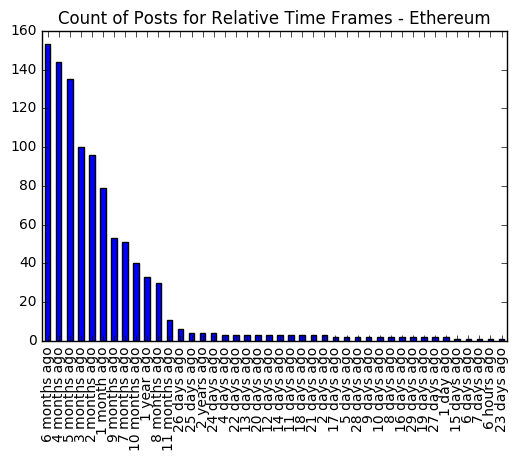

In [22]:
posttime_rel(threads_eth, 'Ethereum')

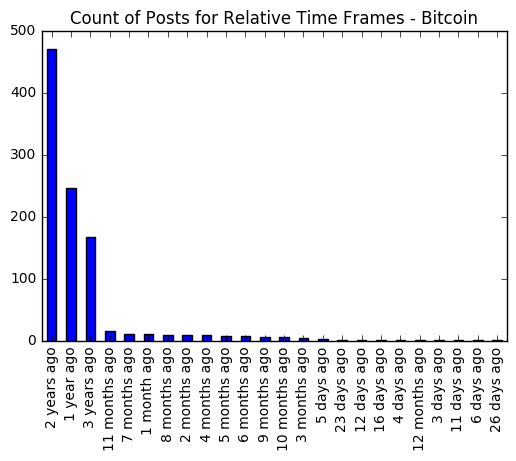

In [23]:
posttime_rel(threads_btc, 'Bitcoin')

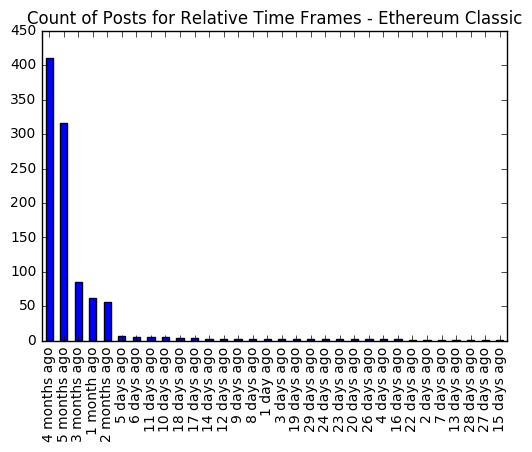

In [24]:
posttime_rel(threads_etc, 'Ethereum Classic')

### Posts per year over all records (as of DOI)

In [25]:
# input for this funtion is DataFrame with column 'year' from the Reddit scrape

def time_year_all(threads, subreddit):
    years = [2013, 2014, 2015, 2016]
    year_dict = dict(threads.year.value_counts())
    year_count = pd.DataFrame.from_dict(data=year_dict, orient='index')
    year_count = year_count.rename(columns={'': 'year', 0: 'count'})
    year_count = year_count.reindex(years)
    year_count.plot(kind='bar').set_title('Count of Posts per Year - %s' % subreddit)

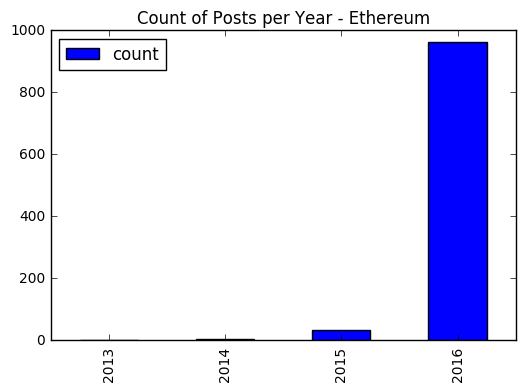

In [26]:
time_year_all(threads_eth, 'Ethereum')

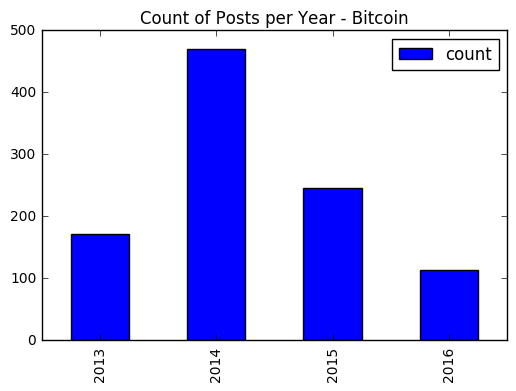

In [27]:
time_year_all(threads_btc, 'Bitcoin')

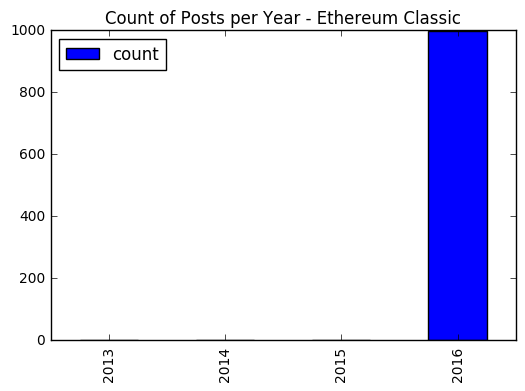

In [28]:
time_year_all(threads_etc, 'Ethereum Classic')

### Posts per month over all records (as of DOI)

In [29]:
# input for this funtion is DataFrame with column 'mon' from the Reddit scrape

def time_month_all(threads, subreddit):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_dict = dict(threads.mon.value_counts())
    month_count = pd.DataFrame.from_dict(data=month_dict, orient='index')
    month_count = month_count.rename(columns={'': 'mon', 0: 'count'})
    month_count = month_count.reindex(months)
    month_count.plot(kind='bar').set_title('Count of Posts per Month - %s' % subreddit)

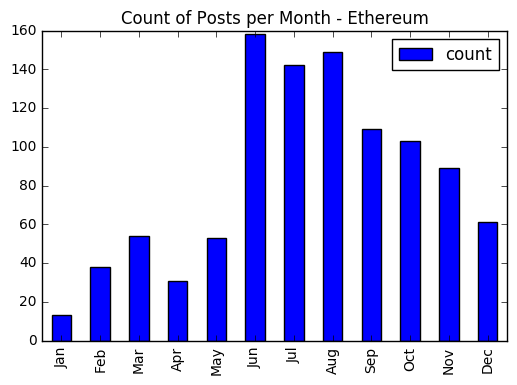

In [30]:
time_month_all(threads_eth, 'Ethereum')

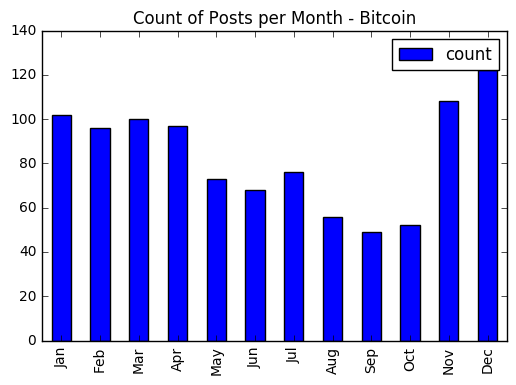

In [31]:
time_month_all(threads_btc, 'Bitcoin')

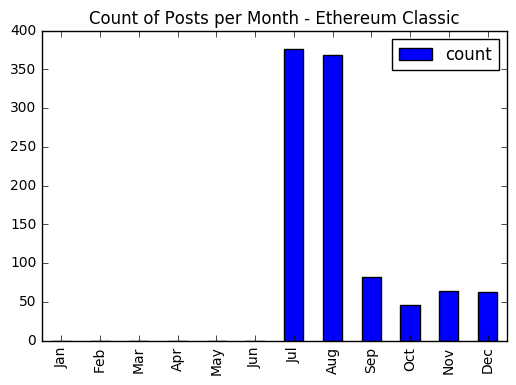

In [32]:
time_month_all(threads_etc, 'Ethereum Classic')

### Post per day of the week over all records (as of DOI)

In [33]:
# input for this funtion is DataFrame with column 'dow' from the Reddit scrape

def time_dow_all(threads, subreddit):
    dows = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    dow_dict = dict(threads.dow.value_counts())
    dow_count = pd.DataFrame.from_dict(data=dow_dict, orient='index')
    dow_count = dow_count.rename(columns={'': 'dow', 0: 'count'})
    dow_count = dow_count.reindex(dows)
    dow_count.plot(kind='bar').set_title('Count of Posts per Day of the Week - %s' % subreddit)

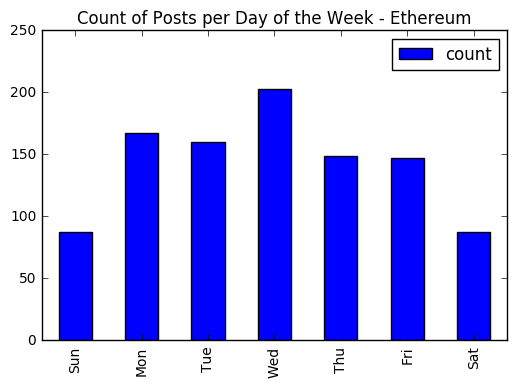

In [34]:
time_dow_all(threads_eth, 'Ethereum')

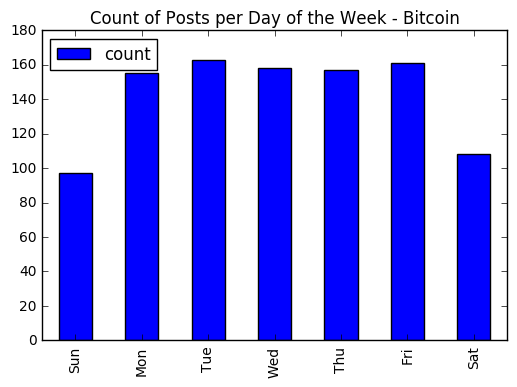

In [35]:
time_dow_all(threads_btc, 'Bitcoin')

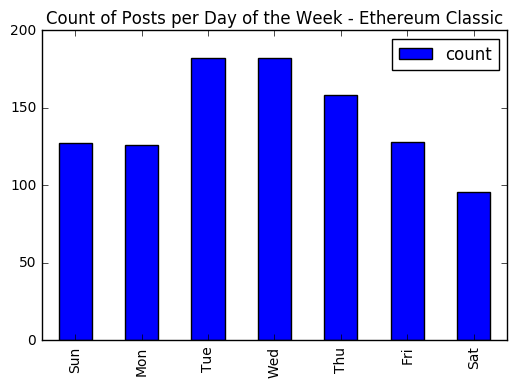

In [36]:
time_dow_all(threads_etc, 'Ethereum Classic')

### Posts per day of the month over all records (as of DOI)

In [37]:
# input for this funtion is DataFrame with column 'day' from the Reddit scrape

def time_day_all(threads, subreddit):
    days = list(range(1,32,1))
    day_dict = dict(threads.day.value_counts())
    day_count = pd.DataFrame.from_dict(data=day_dict, orient='index')
    day_count = day_count.rename(columns={'': 'day', 0: 'count'})
    day_count = day_count.reindex(days)
    day_count.plot(kind='bar').set_title('Count of Posts per Day of the Month - %s' % subreddit)


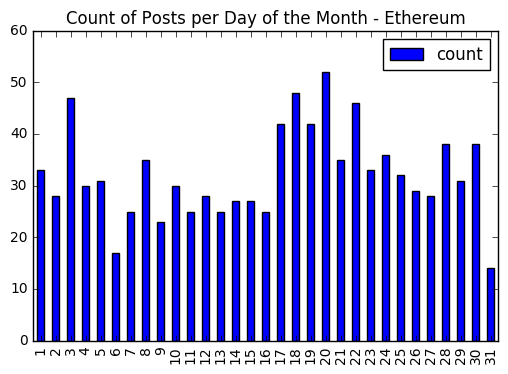

In [38]:
time_day_all(threads_eth, 'Ethereum')

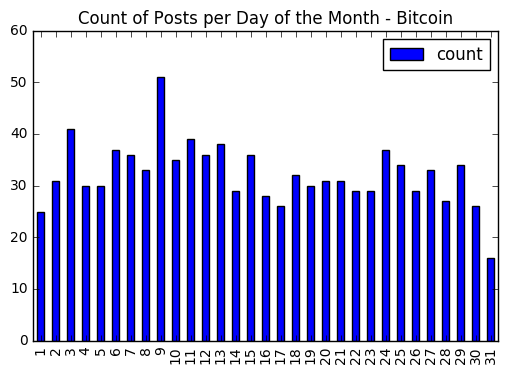

In [39]:
time_day_all(threads_btc, 'Bitcoin')

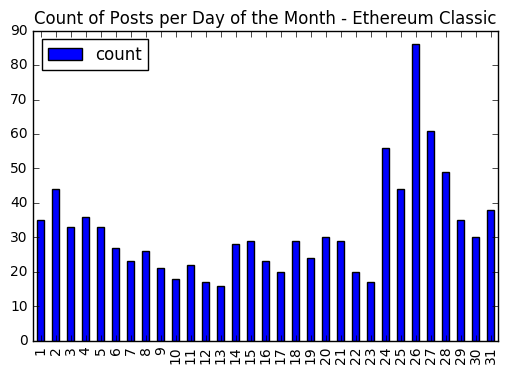

In [40]:
time_day_all(threads_etc, 'Ethereum Classic')

In [ ]:
# I need a function that groups the same date-time category and compares activity between subreddits

### Posts per subreddit per time frame for specific author

In [41]:
# Function charts pattern of specific author within Ethereum, Bitcoin, or Ethereum Classic subreddit
# Function accepts for time: time_rel, dow, mon, day, year (inherits from time series function above)
# Function accepts for subreddit: eth, btc, etc

def auth_time_frames(lines, time):
    if time == 'time_rel':
        posttime_rel(lines, '')
    elif time == 'mon':
        time_month_all(lines, '')
    elif time == 'dow':
        time_dow_all(lines, '')
    elif time == 'day':
        time_day_all(lines, '')
    elif time == 'year':
        time_year_all(lines, '')

def auth_times(auth, subreddit, time):
    if subreddit == 'eth':
        lines = threads_eth.loc[threads_eth['author'] == auth]
        auth_time_frames(lines, time)
    elif subreddit == 'btc':
        lines = threads_btc.loc[threads_btc['author'] == auth]
        auth_time_frames(lines, time)
    elif subreddit == 'etc':
        lines = threads_etc.loc[threads_etc['author'] == auth]
        auth_time_frames(lines, time)


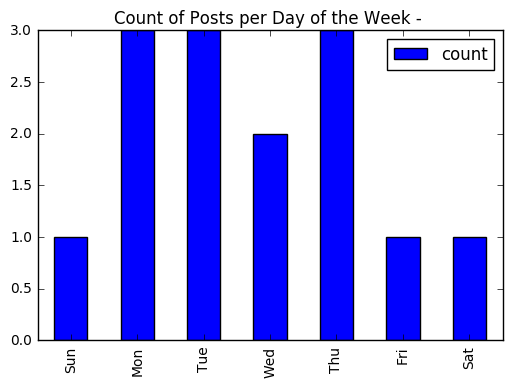

In [42]:
auth_times('Egon_1', 'btc', 'dow')

# Next addition is to show top trending words from posts for these time periods in a list with the above
# Then I need a function that groups the same date-time category and compares activity between the above author, subreddit, date-time

## Analysis of Title Content

### Wordclouds for all posts in ETH, BTC, or ETC subreddit

In [43]:
# Create text files for wordclouds

# regex for punctuation exclusion
exclude = re.compile('[%s]' % re.escape(punctuation))

# write titles to file with punctuation replaced by spaces
with open('redditData/threads_eth.txt', 'w') as eth_f:
    for line in threads_eth['title']:
        line_nopunct = exclude.sub(' ', line)
        eth_f.write(line_nopunct + ' ')

with open('redditData/threads_btc.txt', 'w') as btc_f:
    for line in threads_btc['title']:
        line_nopunct = exclude.sub(' ', line)
        btc_f.write(line_nopunct + ' ')

with open('redditData/threads_etc.txt', 'w') as etc_f:
    for line in threads_etc['title']:
        line_nopunct = exclude.sub(' ', line)
        etc_f.write(line_nopunct + ' ')

In [44]:
# wordcloud generator function for raw files

def wcg(file):
    text = open(file).read()
    text = text.lower()
    #reddit_mask = np.array(Image.open('sil.jpg'))
    wc = WordCloud(width=1440, height=900, background_color='white') # and mask=reddit_mask for your desired JPG
    wc.generate(text)
    image_file = '%s.jpg' % file
    wc.to_file(image_file)

In [ ]:
# JPG wordcloud files for all words in subreddit

# wcg('redditData/threads_eth.txt')
# wcg('redditData/threads_btc.txt')
# wcg('redditData/threads_etc.txt')

Click to view output
[ETH](images/threads_eth.txt.jpg)
[BTC](images/threads_btc.txt.jpg)
[ETC](images/threads_etc.txt.jpg)

### Word frequency tables for ETH, BTC, and ETC

In [45]:
# Stop word list

stopwords = ['-', '&', ',', ':', ';', '.', ',', 'don', 've', 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'either', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fill', 'find', 'for', 'former', 'formerly', 'found', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on','once', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'take', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']

In [46]:
# word frequency table for Ethereum

with open('redditData/threads_eth.txt', 'r') as eth_f:
    words_eth = eth_f.read()
    wordlist_eth = words_eth.lower().split()
    wordcount_eth = Counter(wordlist_eth)
    wordcount_eth2 = pd.DataFrame.from_dict(wordcount_eth, orient='index').reset_index()
    wordcount_eth2 = wordcount_eth2.rename(columns={'index':'word', 0:'count'})
    
# DataFrame of unique values not in stopword list in descending order
wordcount_eth2[wordcount_eth2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(20)

# Summary of above eth2 DataFrame
# summary_wordcount_eth2 = wordcount_eth2[wordcount_eth2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False)
# summary_wordcount_eth2.describe()

,word,count
2067,ethereum,387
1076,fork,98
1022,eth,78
2,dao,76
1303,blockchain,74
2282,new,71
727,1,62
1196,hard,59
2055,0,42
1078,100,42


In [47]:
# word frequency table for Bitcoin

with open('redditData/threads_btc.txt', 'r') as btc_f:
    words_btc = btc_f.read()
    wordlist_btc = words_btc.lower().split()
    wordcount_btc = Counter(wordlist_btc)
    wordcount_btc2 = pd.DataFrame.from_dict(wordcount_btc, orient='index').reset_index()
    wordcount_btc2 = wordcount_btc2.rename(columns={'index':'word', 0:'count'})
    
# DataFrame of unique values not in stopword list in descending order
wordcount_btc2[wordcount_btc2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(20)

# Summary of above btc2 DataFrame
# summary_wordcount_btc2 = wordcount_btc2[wordcount_btc2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False)
# summary_wordcount_btc2.describe()

,word,count
1755,bitcoin,565
2628,just,61
3518,bitcoins,55
1018,t,53
2624,new,40
2138,r,37
1744,btc,35
3288,accepting,34
2467,reddit,31
3210,coinbase,31


In [48]:
# word frequency table for Ethereum Classic

with open('redditData/threads_etc.txt', 'r') as etc_f:
    words_etc = etc_f.read()
    wordlist_etc = words_etc.lower().split()
    wordcount_etc = Counter(wordlist_etc)
    wordcount_etc2 = pd.DataFrame.from_dict(wordcount_etc, orient='index').reset_index()
    wordcount_etc2 = wordcount_etc2.rename(columns={'index':'word', 0:'count'})
    
# DataFrame of unique values not in stopword list in descending order
wordcount_etc2[wordcount_etc2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(20)

# Summary of above etc2 DataFrame
# summary_wordcount_etc2 = wordcount_etc2[wordcount_etc2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False)
# summary_wordcount_etc2.describe()

,word,count
1844,ethereum,345
745,classic,240
922,eth,122
415,fork,66
2,dao,54
2190,support,49
1071,hard,47
1172,blockchain,39
1593,bitcoin,36
657,1,32


### Word clouds for all posts in ETH, BTC, or ETC with stopwords

In [49]:
# create stopword functions for ETH, BTC, and ETC from word frequency lists
# the stopwords 'top_terms_remove" will the top most mentioned words in the eth, btc, or etc forum

def stopword_eth(top_terms_remove):
    stopword_eth = wordcount_eth2[wordcount_eth2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(top_terms_remove)
    stopword_eth = list(stopword_eth.word)
    return stopword_eth

# stopword_eth(5)

def stopword_btc(top_terms_remove):
    stopword_btc = wordcount_btc2[wordcount_btc2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(top_terms_remove)
    stopword_btc = list(stopword_btc.word)
    return stopword_btc

# stopword_btc(5)

def stopword_etc(top_terms_remove):
    stopword_etc = wordcount_etc2[wordcount_etc2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(top_terms_remove)
    stopword_etc = list(stopword_etc.word)
    return stopword_etc

# stopword_etc(5)

In [50]:
# wordcloud generator function for txt files from ['eth', 'btc', 'etc'] with n number top words as stop words

def wcg_stop(file, stop, number_top_terms):
    text = open(file).read()
    text = text.lower()
    if stop == 'eth':
        stop_wc = stopword_eth(number_top_terms)
    elif stop == 'btc':
        stop_wc = stopword_btc(number_top_terms)
    elif stop == 'etc':
        stop_wc = stopword_etc(number_top_terms)
    wc = WordCloud(width=1440, height=900, background_color='white', stopwords=stop_wc + stopwords)
    wc.generate(text)
    wc.to_file('%s.jpg' % (file+('_notop_')+str(number_top_terms)))

In [ ]:
# wcg_stop('redditData/threads_eth.txt', 'eth', 30)

In [ ]:
# wcg_stop('redditData/threads_btc.txt', 'btc', 30)

In [ ]:
# wcg_stop('redditData/threads_etc.txt', 'etc', 30)

### Word clouds per author

In [51]:
# Create text files for wordclouds

# regex for punctuation exclusion
exclude = re.compile('[%s]' % re.escape(punctuation))

# write titles for specific Ethereum subreddit author to txt file
# wordcloud of all Ethereum author posts
def auth_wordcloud_eth(auth):
    with open('redditData/threads_eth_auth.txt', 'w') as eth_fauth:
        lines = threads_eth.loc[threads_eth['author'] == auth]
        for line in lines['title']:
            line_nopunct = exclude.sub(' ', line)
            eth_fauth.write(line_nopunct + ' ')
    auth_rename = 'redditData/threads_eth_%s.txt' % auth
    os.rename('redditData/threads_eth_auth.txt', auth_rename)
    wcg(auth_rename)

# write titles for specific Bitcoin subreddit author to txt file
# wordcloud of all Bitcoin author posts
def auth_wordcloud_btc(auth):
    with open('redditData/threads_btc_auth.txt', 'w') as btc_fauth:
        lines = threads_btc.loc[threads_btc['author'] == auth]
        for line in lines['title']:
            line_nopunct = exclude.sub(' ', line)
            btc_fauth.write(line_nopunct + ' ')
    auth_rename = 'redditData/threads_btc_%s.txt' % auth
    os.rename('redditData/threads_btc_auth.txt', auth_rename)
    wcg(auth_rename)

# write titles for specific Ethereum Classic subreddit author to txt file
# wordcloud of all Ethereum Classic author posts
def auth_wordcloud_etc(auth):
    with open('redditData/threads_etc_auth.txt', 'w') as etc_fauth:
        lines = threads_etc.loc[threads_etc['author'] == auth]
        for line in lines['title']:
            line_nopunct = exclude.sub(' ', line)
            etc_fauth.write(line_nopunct + ' ')
    auth_rename = 'redditData/threads_etc_%s.txt' % auth
    os.rename('redditData/threads_etc_auth.txt', auth_rename)
    wcg(auth_rename)


In [ ]:
# Authors with the most number of posts
# auth_wordcloud_eth('vbuterin')
# auth_wordcloud_eth('thehighfiveghost')
# auth_wordcloud_eth('Souptacular')
# auth_wordcloud_eth('avsa')
# auth_wordcloud_eth('Ursium')

# Authors with highest number of comments (if not above)
# auth_wordcloud_eth('baddogesgotoheaven')
# auth_wordcloud_eth('latetot')

# generate Ethereum author word cloud of all author posts with stop words

# wcg_stop('redditData/threads_eth_vbuterin.txt', 'eth', 30)

In [ ]:
# Authors with the most number of posts
# auth_wordcloud_btc('Egon_1')
# auth_wordcloud_btc('bubbasparse')
# auth_wordcloud_btc('evoorhees')
# auth_wordcloud_btc('SeansOutpost')
# auth_wordcloud_btc('Godfreee')

# Authors with highest number of comments (if not above)
# auth_wordcloud_btc('zanetackett')
# auth_wordcloud_btc('BenLawsky')
# auth_wordcloud_btc('hexdump')
# auth_wordcloud_btc('Zomdifros')

# generate Bitcoin author word cloud of all author posts with stop words

# wcg_stop('redditData/threads_btc_Egon_1.txt', 'btc', 30)

In [ ]:
# Authors with the most number of posts
# auth_wordcloud_etc('bit_novosti')
# auth_wordcloud_etc('trillionaire777')
# auth_wordcloud_etc('finish-the-thought')
# auth_wordcloud_etc('CarloVetc')
# auth_wordcloud_etc('Egon_1')

# Authors with highest number of comments (if not above)
# auth_wordcloud_etc('ttggtthhh')
# auth_wordcloud_etc('jbaylina')
# auth_wordcloud_etc('publius2050000')
# auth_wordcloud_etc('slacknation')
# auth_wordcloud_etc('biglambda')

# generate Ethereum Classic author word cloud of all author posts with stop words

# wcg_stop('redditData/threads_etc_bit_novosti.txt', 'etc', 5)

### Titles for author's top results

In [52]:
# use the eth_comments, btc_comments, and etc_comment object from above
# These data frame contain authors, comments, and title from all 1000 top posts

def auth_top_title(auth, subreddit, num_top_results):
    if subreddit == 'eth':
        eth_auth_top_title = eth_comments[eth_comments.author == auth]
        eth_auth_top_title = eth_auth_top_title.sort_values(by='comments', ascending=False).head(num_top_results)
        return eth_auth_top_title
    elif subreddit == 'btc':
        btc_auth_top_title = btc_comments[btc_comments.author == auth]
        btc_auth_top_title = btc_auth_top_title.sort_values(by='comments', ascending=False).head(num_top_results)
        return btc_auth_top_title
    elif subreddit == 'etc':
        etc_auth_top_title = etc_comments[etc_comments.author == auth]
        etc_auth_top_title = etc_auth_top_title.sort_values(by='comments', ascending=False).head(num_top_results)
        return etc_auth_top_title

In [53]:
auth_top_title('Egon_1', 'btc', 10)

,author,comments,title
925,Egon_1,475,"Brian Armstrong on Twitter: ""Ripple, Stellar, ..."
0,Egon_1,438,Edward Snowden on Twitter: Imagine if the gove...
402,Egon_1,262,OVERSTOCK CEO: Amazon Will Be Forced To Start ...
198,Egon_1,243,The risk of not owning your hardware (hint Bit...
417,Egon_1,196,Stripe is testing Bitcoin
540,Egon_1,185,We should stop begging PayPal to accept Bitcoi...
220,Egon_1,183,Rapper 50 Cent Accepts Bitcoin For New Album '...
571,Egon_1,179,"Overstock.com: ""About $10,000 worth of Bitcoin..."
742,Egon_1,177,Richard Branson to Host Bitcoin Summit on Priv...
319,Egon_1,170,Solid Bitcoin trading tip


### Word clouds per subreddit per time frame for specific time

In [54]:
# Function generates time frame word clouds of specific times within Ethereum, Bitcoin, or Ethereum Classic subreddit
# Function accepts for time: time_rel, dow, mon, day, year
# Function accepts for subreddit: eth, btc, etc

def wordcloud_times(subreddit, time_cat, time):
    exclude = re.compile('[%s]' % re.escape(punctuation))
    if subreddit == 'eth':
        lines = threads_eth.loc[threads_eth[time_cat] == time]
    elif subreddit == 'btc':
        lines = threads_btc.loc[threads_btc[time_cat] == time]
    elif subreddit == 'etc':
        lines = threads_etc.loc[threads_etc[time_cat] == time]
    wordlist = ""
    for line in lines['title']:
        line_nopunct = exclude.sub(' ', line)
        wordlist += (line_nopunct + ' ')
    wordlist = wordlist.lower()
    wc = WordCloud(width=1440, height=900, background_color='white') # and mask=reddit_mask for your desired JPG
    wc.generate(wordlist)
    image_file = 'images/%s.jpg' % ('wordcloud_times_'+str(subreddit)+'_'+str(time_cat)+'_'+str(time))
    wc.to_file(image_file)


In [ ]:
# wordcloud_times('etc', 'dow', 'Mon')

## Comparison of Reddit Content to Interviews and Conversations

#### Due to confidentiality, I cannot include my interview and conversation data. However, you can generate fake data with the Faker library. :)

In [55]:
# Word clouds for Interviews and Conversations

def interview_wordcloud(filename):
    exclude = re.compile('[%s]' % re.escape(punctuation))
    with open(filename, 'r') as interview:
        for lines in interview:
            line_nopunct = exclude.sub(' ', lines)
        text = line_nopunct.lower()
        wc = WordCloud(width=1440, height=900, background_color='white') # and mask=reddit_mask for your desired JPG
        wc.generate(text)
        image_file = '%s.jpg' % filename
        wc.to_file(image_file)


In [57]:
# Word frequency table for Interviews and Conversations

def interview_wordfreq(filename, head):
    with open(filename, 'r') as interview:
        exclude = re.compile('[%s]' % re.escape(punctuation))
        words = interview.read()
        words_nopunct = exclude.sub(' ', words)
        wordlist = words_nopunct.lower().split()
        wordcount = Counter(wordlist)
        wordcount2 = pd.DataFrame.from_dict(wordcount, orient='index').reset_index()
        wordcount2 = wordcount2.rename(columns={'index':'word', 0:'count'})
    
    # DataFrame of unique values not in stopword list in descending order
    wordcount_stop = wordcount2[wordcount2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(head)
    
    # Summary of above Interview DataFrame
    # summary_wordcount2 = wordcount2[wordcount2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False)
    
    return wordcount_stop #, summary_wordcount2.describe()

In [58]:
# Word cloud generator function for txt files from interviews with n number top words as stop words

def interview_stopword(filename, top_terms_remove):
    with open(filename, 'r') as interview:
        exclude = re.compile('[%s]' % re.escape(punctuation))
        words = interview.read()
        words_nopunct = exclude.sub(' ', words)
        words_text = words_nopunct.lower()
        wordlist = words_nopunct.lower().split()
        wordcount = Counter(wordlist)
        wordcount2 = pd.DataFrame.from_dict(wordcount, orient='index').reset_index()
        wordcount2 = wordcount2.rename(columns={'index':'word', 0:'count'})
    
    # DataFrame of unique values not in stopword list in descending order
    wordcount_stop = wordcount2[wordcount2['word'].map(lambda x: x not in stopwords)].sort_values('count', ascending=False).head(top_terms_remove)
    stopword_interview = list(wordcount_stop.word)
    wc = WordCloud(width=1440, height=900, background_color='white', stopwords=stopword_interview + stopwords)
    wc.generate(words_text)
    wc.to_file('%s.jpg' % (filename+('_notop_')+str(top_terms_remove)))


In [ ]:
# Combine total corpus of Conversations

filenames = os.listdir('otherData/')

if os.path.isfile('otherData/conv_comb.txt') == True:
    print("this file alread exists")
    break
    

with open('otherData/conv_comb.txt', 'w') as conv_comb:
    filenames = filenames
    for filename in filenames:
        with open('otherData/%s' % filename) as single_file:
            for line in single_file:
                conv_comb.write(line)

In [ ]:
with open('otherData/conv_comb.txt', 'r') as conv_comb:
    for line in conv_comb:
        with open('otherData/conv_comb2.txt', 'w') as conv_comb2:
            conv_comb2.write(" ".join(line.rstrip('\n') for line in conv_comb))

In [ ]:
# word cloud for Conversations

interview_wordcloud('otherData/conv_comb2.txt')

In [ ]:
# word frequency for Conversations with n top results

interview_wordfreq('otherData/conv_comb2.txt', 25)

In [ ]:
# word cloud for all Interviews and Conversations with n top results as stop words

interview_stopword('otherData/conv_comb2.txt', 30)

In [ ]:
# need to create a table of most common overlapping words between interview data and Reddit with counts

## Comparison of Reddit Content to Pyethapp, Pyethereum, and Pydevp2p Documentation

#### I parsed these 4 libraries from my functional Pyethereum virtual environment. This analysis will begin with already parsed TXT files. The Jupyter notebook will be in the 'code_analysis' folder of this project.
#### I had an issue with parsing the docstring from 'pyethereum', but will note when I resolve the issue.

### Word clouds for all documentation from Pyethapp, Pyethereum, and Pydevp2p libraries

In [ ]:
# Use interview_wordcloud as it's the same process

# interview_wordcloud('codeData/wiki_pea_comb2.txt')
# interview_wordcloud('codeData/wiki_peth_comb2.txt')
# interview_wordcloud('codeData/docs_pea_comb2.txt')
# interview_wordcloud('codeData/docs_pdev_comb2.txt')

### Word frequency tables for all documentation from Pyethapp, Pyethereum, and Pydevp2p libraries

In [ ]:
# Use interview_wordfreq as it's the same process

# interview_wordfreq('codeData/wiki_pea_comb2.txt', 25)
# interview_wordfreq('codeData/wiki_peth_comb2.txt', 25)
# interview_wordfreq('codeData/docs_pea_comb2.txt', 25)
# interview_wordfreq('codeData/docs_pdev_comb2.txt', 25)